In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neurokit2 as nk

from lists import list_str, datafiles, datafiles_1k, datafiles_raw, datafiles_google, datafiles_raw_google

In [4]:
# Load ECG-data as list
data_raw = [None]*len(list_str)
for i in range(len(list_str)):
    data_raw[i] = np.load(datafiles_raw[i])
    #data_raw[i] = np.load(datafiles_raw_google[i])

In [5]:
# Analyze raw ECG data
''' Don't normalize twice with inbuilt functions, for instance ecg_clean'''

sampling_rate=1000

data_raw_0 = pd.Series(data_raw[0].ravel()) #.ravel() to remove redundant parentheses
ecg_0, info = nk.ecg_process(data_raw_0, sampling_rate=sampling_rate)
data_0 = ecg_0["ECG_Clean"]

data_raw_16 = pd.Series(data_raw[16].ravel()) #.ravel() to remove redundant parentheses
ecg_16, info = nk.ecg_process(data_raw_16, sampling_rate=sampling_rate)
data_16 = ecg_16["ECG_Clean"]

ecg_16

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.029164,-0.005867,72.427870,0.958539,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.018745,-0.006552,72.427870,0.958539,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.010641,-0.007240,72.427870,0.958539,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.005431,-0.007943,72.427870,0.958539,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.000221,-0.008626,72.427870,0.958539,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.026423,0.061551,69.124424,0.433126,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
319996,0.022950,0.059530,69.124424,0.433126,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
319997,0.022950,0.057552,69.124424,0.433126,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
319998,0.020635,0.055581,69.124424,0.433126,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


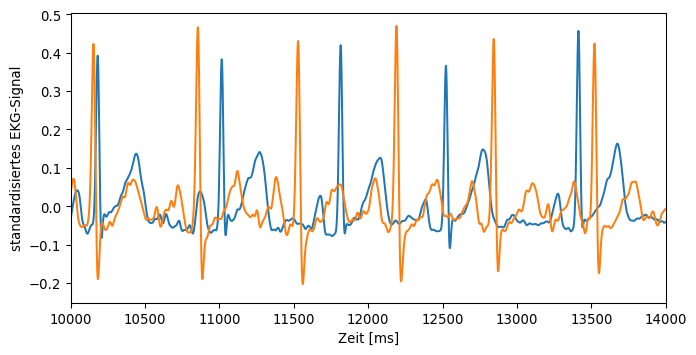

In [6]:
xlim1 = 10*sampling_rate
xlim2 = 14*sampling_rate

# Plot cleaned ECG data for a dyad
fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('standardisiertes EKG-Signal')
plt.plot(data_0[:xlim2])
plt.plot(data_16[:xlim2])

plt.savefig("plots\ecg_data.png", dpi=96)

5 6


320000

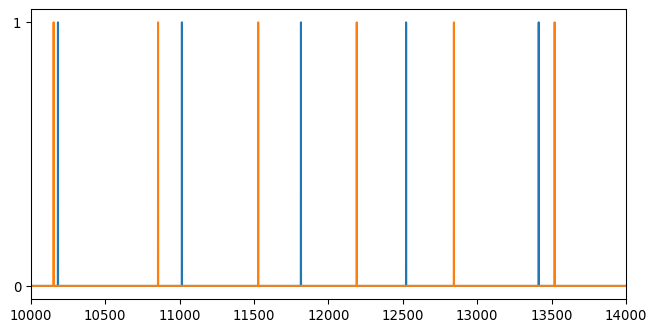

In [7]:
# Create IBIs
ibi_bin_0 = ecg_0["ECG_R_Peaks"] # bin for binary
ibi_bin_16 = ecg_16["ECG_R_Peaks"]
# ibi_bin_0 = ibi_bin_0[:50000]
# ibi_bin_16 = ibi_bin_16[:50000]

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.yticks(range(2))
plt.plot(ibi_bin_0[:xlim2])
plt.plot(ibi_bin_16[:xlim2])

print(sum(ibi_bin_0[xlim1:xlim2]),sum(ibi_bin_16[xlim1:xlim2]))

len(ibi_bin_0)

372 320000


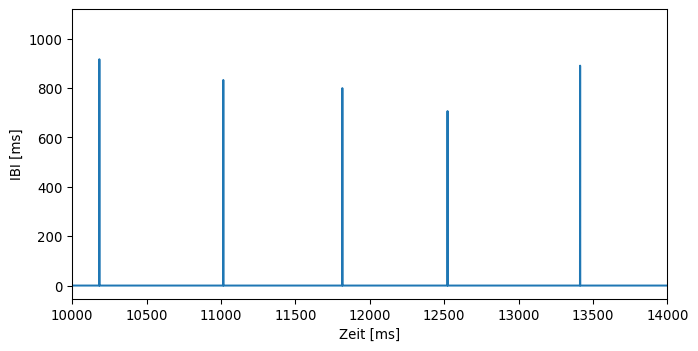

In [39]:
# Create tachogram
'''REMINDER: How to handle data till first IBI?'''

def get_ibi(ibi_bin):
        temp = np.squeeze(np.array(np.where(ibi_bin == 1)))
        ibi = []
        for i in range(len((temp))):
                if i > 0: # skip first iteration
                        ibi.append(temp[i]-temp[i-1])
        return ibi, temp[1] # temp[1], not temp[0], to get the true starting point for the IBI-intervals (=differences)


ibi_16, temp_16 = get_ibi(ibi_bin_16)
ibi_0, temp_0 = get_ibi(ibi_bin_0)

# fig = plt.figure(figsize=(8,4), dpi=96)
# plt.plot(ibi_0)
# plt.plot(ibi_16)

def get_ibi_time(ibi_bin, ibi, temp, begin_at_0): # begin_at_0 to add zeros for true lenght of the time series
    ibi_time = ibi_bin[temp:]
    ibi_time = np.array(ibi_time)

    j = 0
    for i in range(len(ibi_time)):
        if ibi_time[i] == 1:
            ibi_time[i] = ibi[j]
            j = j+1
    ibi_time = pd.Series(ibi_time)

    if begin_at_0 == "True":
        intro = pd.Series(np.zeros((temp)))
        ibi_time = pd.concat([intro, ibi_time],ignore_index=True)

    return ibi_time

ibi_time_0 = get_ibi_time(ibi_bin_0, ibi_0, temp_0,"True")
ibi_time_16 = get_ibi_time(ibi_bin_16, ibi_16, temp_16,"True")

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(ibi_time_0)
# plt.plot(ibi_time_16)

print(len(ibi_0),len(ibi_time_0))


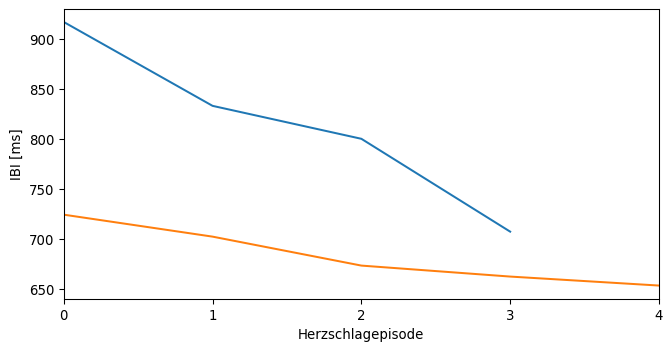

In [9]:
# Plot IBIs with interval from xlim1 to xlim2
def get_ibi_lim(ibi, ibi_time, xlim1, xlim2):
    lim1_time = np.argmax(ibi_time[xlim1:xlim2]>0) + xlim1
    lim2_time = xlim2 - np.argmax(ibi_time[xlim2:xlim1:-1]>0)
    
    lim1 = ibi.index(ibi_time[lim1_time])
    lim2 = ibi.index(ibi_time[lim2_time])

    return lim1, lim2

lim1_0, lim2_0 = get_ibi_lim(ibi_0, ibi_time_0, xlim1, xlim2)
lim1_16, lim2_16 = get_ibi_lim(ibi_16, ibi_time_16, xlim1, xlim2)

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xticks(range(0,100)) # looks better
plt.xlabel('Herzschlagepisode')
plt.ylabel('IBI [ms]')
plt.margins(x=0)
plt.plot(ibi_0[lim1_0:lim2_0])
plt.plot(ibi_16[lim1_16:lim2_16])

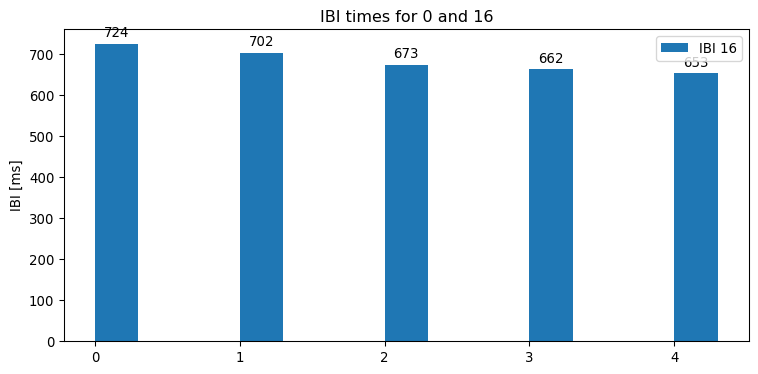

In [42]:
ibi_0_plot = ibi_0[lim1_0:lim2_0] + [np.nan]
ibi_16_plot = ibi_16[lim1_16:lim2_16]

width = 0.3  # the width of the bars
x = np.arange(len(ibi_0_plot))  # the label locations

fig, ax = plt.subplots(figsize=(8,4), dpi=96)
# rects1 = ax.bar(x - width/2, ibi_0_plot, width, label='IBI 0')
rects2 = ax.bar(x + width/2, ibi_16_plot, width, label='IBI 16')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IBI [ms]')
ax.set_title('IBI times for 0 and 16')
ax.set_xticks(x)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [9]:

data = [ibi_0_plot, ibi_16_plot]
data

[[917, 833, 800, 707, nan], [724, 702, 673, 662, 653]]

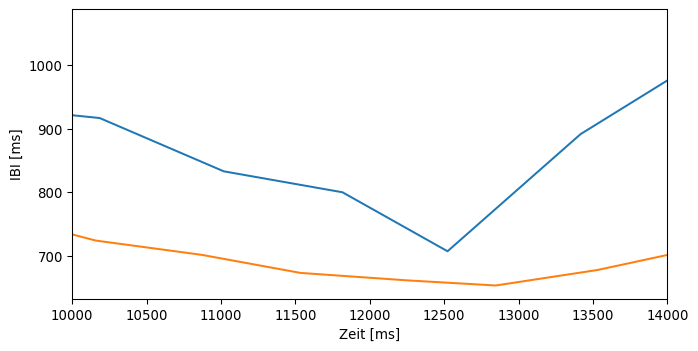

In [10]:
# Imputate IBIs
def get_ibi_impu(ibi_time):
    ibi_impu = ibi_time.replace(0, np.nan, inplace=False)
    ibi_impu = ibi_impu.interpolate(method='linear', axis=0, limit=None, inplace=False)
    return ibi_impu

ibi_impu_0 = get_ibi_impu(ibi_time_0)
ibi_impu_16 = get_ibi_impu(ibi_time_16)

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(ibi_impu_0)
plt.plot(ibi_impu_16)

# plt.plot(diff16) # for a similar plot, auto-created by matplotlib

In [11]:
# TODO: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Resampling-and-converting-frequencies

262994.9353701298 315452.0


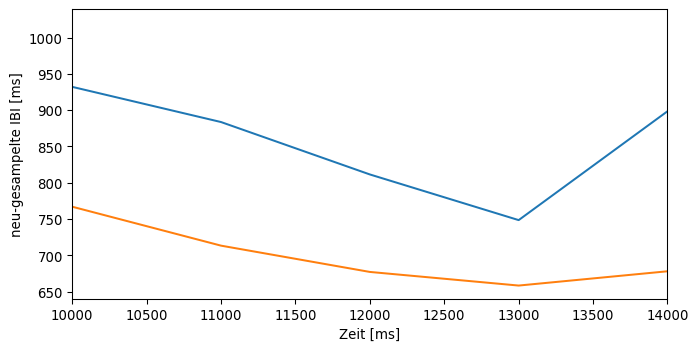

In [12]:
# Resampling at 1 Hz with rolling windows
def get_ibi_impu_win(ibi_impu):
    ibi_impu_win = ibi_impu.rolling(sampling_rate).mean() 
    ibi_impu_win = ibi_impu_win.iloc[::sampling_rate] 
    ''' TODO: scrutinize & check if it is 100% correct '''
    
    return ibi_impu_win

ibi_impu_win_0 = get_ibi_impu_win(ibi_impu_0)
ibi_impu_win_16 = get_ibi_impu_win(ibi_impu_16)

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.xlabel('Zeit [ms]')
plt.ylabel('neu-gesampelte IBI [ms]')
plt.margins(x=0)
plt.plot(ibi_impu_win_0)
plt.plot(ibi_impu_win_16)

print(sum(ibi_impu_win_16[4:]), sum(ibi_time_16[4000:]))

320000

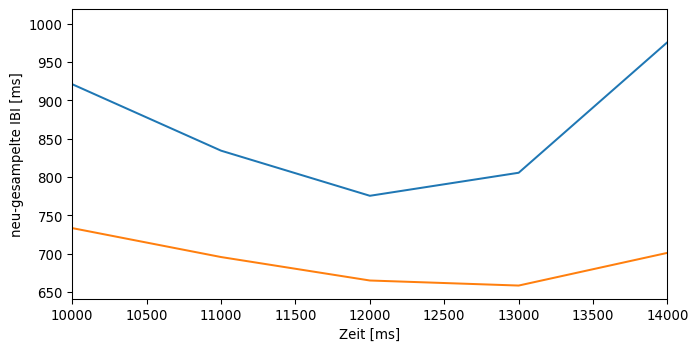

In [13]:
# Resampling at 1 Hz
ibi_impu_1hz_0 = ibi_impu_0[::sampling_rate]
ibi_impu_1hz_16 = ibi_impu_16[::sampling_rate]

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlabel('Zeit [ms]')
plt.ylabel('neu-gesampelte IBI [ms]')
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.plot(ibi_impu_1hz_0)
plt.plot(ibi_impu_1hz_16)

len(ibi_impu_0)

30969.0 27615.23659284585 27563.084823441797


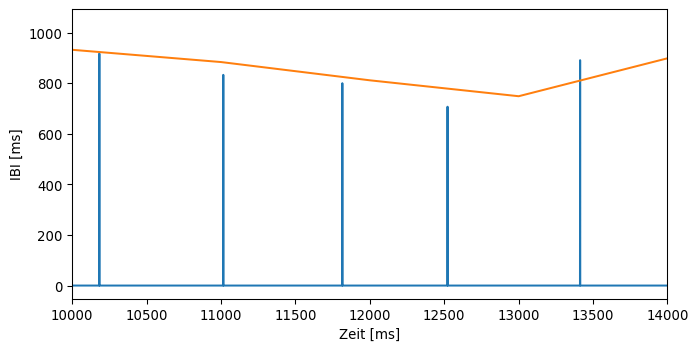

In [14]:
# Checksum for IBI and imputated IBI

print(sum(ibi_time_0[9000:40000]),sum(ibi_impu_win_0[9:40]),sum(ibi_impu_1hz_0[9:40]))

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.plot(ibi_time_0[9000:40000])
plt.plot(ibi_impu_win_0[9:40])
#plt.plot(ibi_impu_0[9000:40000:sampling_rate])
#plt.plot(ibi_impu_0[9000:])

372 320 320


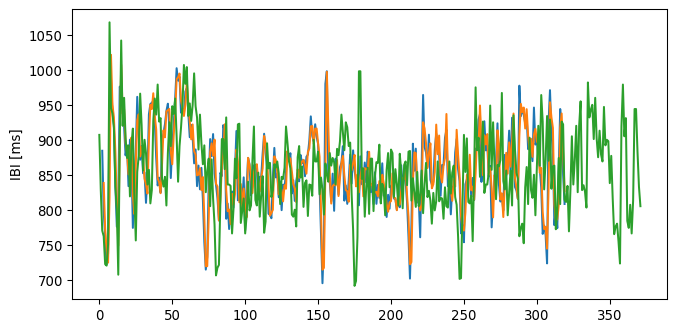

In [15]:
print(len(ibi_0),len(ibi_impu_1hz_0),len(ibi_impu_win_0))

fig = plt.figure(figsize=(8,4), dpi=96)
# plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(np.array(ibi_impu_1hz_0))
plt.plot(np.array(ibi_impu_win_0))
plt.plot(np.array(ibi_0))

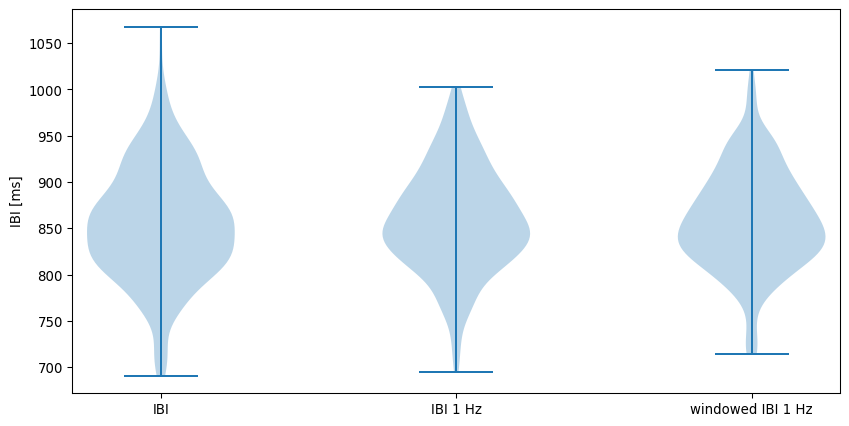

In [16]:
# Create Violin plot
## combine these different collections into a list
data_to_plot = [ibi_0, np.array(ibi_impu_1hz_0[2:]), np.array(ibi_impu_win_0[3:])] # [x:] because of NaNs


fig = plt.figure(figsize=(8,4), dpi=96)
ax = fig.add_axes([0,0,1,1])
plt.xticks(ticks=[1,2,3], labels=["IBI","IBI 1 Hz","windowed IBI 1 Hz"])
plt.ylabel('IBI [ms]')
# plt.margins(y=0.01)
plt.margins(x=0.02)

bp = ax.violinplot(data_to_plot)
# bp = ax.boxplot(data_to_plot)
plt.show()

In [27]:
# Cosine interpolation
from math import pi,cos

r_ind_0 = [i for i, x in enumerate(ibi_bin_0) if x == 1]
r_ind_16 = [i for i, x in enumerate(ibi_bin_16) if x == 1]

def cosine(x, x1, x2):
    T = x2-x1
    val = 0.5* cos(2.0 * pi * (x - x1) / T)
    return val

def get_trig_impu(r_ind,ibi_time):
    trig_impu = [0]*r_ind[0]
    for i in range(len(r_ind)):
        if i == len(r_ind)-1:
            break
        x1 = r_ind[i]
        x2 = r_ind[i+1]
        T = x2-x1
        f = lambda x: cosine(x, x1, x2)
        x = np.linspace(x1,x2,T)
        y = [f(x) for x in x]

        trig_impu = trig_impu + y
    trig_impu = trig_impu + [0]*(len(ibi_time)-r_ind[-1])
    return trig_impu

trig_impu_0 = get_trig_impu(r_ind_0,ibi_time_0)
trig_impu_16 = get_trig_impu(r_ind_16,ibi_time_16)

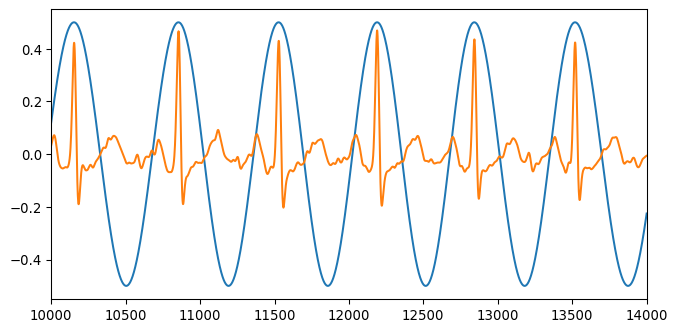

In [36]:
fig = plt.figure(figsize=(8,4), dpi=96)

plt.xlim(xlim1, xlim2)
# plt.plot(ibi_time_16)
test = np.array(trig_impu_16)

plt.plot(test)
plt.plot(data_16)

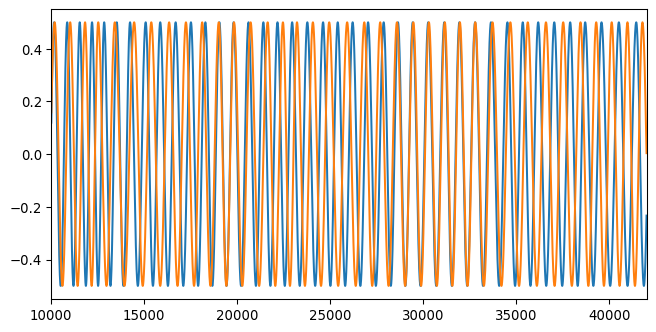

In [38]:
fig = plt.figure(figsize=(8,4), dpi=96)

plt.xlim(xlim1, xlim2*3)
# plt.plot(ibi_time_16)
test = np.array(trig_impu_16)

plt.plot(test)
plt.plot(trig_impu_0)

842.0
1
0.49998687015347326


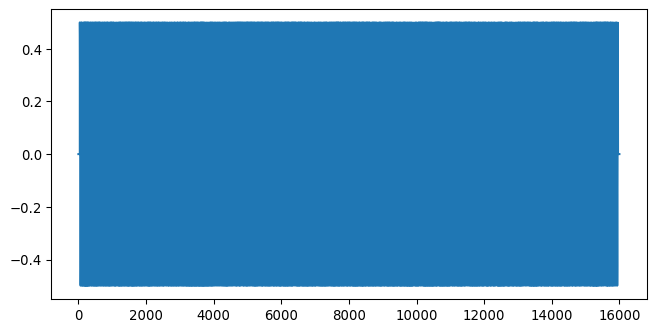

In [30]:
q = 384
print(ibi_time_16[r_ind_16[q]])
print(ibi_bin_16[r_ind_16[q]])
print(trig_impu_16[r_ind_16[q]])
ibi_16[8]

fig = plt.figure(figsize=(8,4), dpi=96)
# plt.xlim(10000,11000)
# # plt.plot(ibi_bin_16)
# plt.plot(trig_impu_16)
plt.plot(trig_impu_0[::20])

In [20]:
a = np.array([trig_impu_0[10000:310000], trig_impu_16[10000:310000]])
b = np.array(trig_impu_16[10000:310000])
a = np.transpose(a)
# df = np.array[a,b]
df = pd.DataFrame(a)
df

df.to_csv("df.csv")

In [1]:
# https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9?gi=adaa371d2114